In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import sqldf
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data

First of all, we load the data received into a pandas dataframe

In [2]:
df = pd.read_csv("ikea.csv", delimiter=";")

In [3]:
df.head()

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,NaN,NaN,7969


# Exploratory Data Analysis

Before answering the different questions proposed, we analyze a little bit the structure of the dataset and the different columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerID     537577 non-null  int64  
 1   ItemID         537577 non-null  object 
 2   Sex            537577 non-null  object 
 3   Age            537577 non-null  object 
 4   Profession     537577 non-null  int64  
 5   CityType       537577 non-null  object 
 6   YearsInCity    537577 non-null  object 
 7   HaveChildren   517407 non-null  float64
 8   ItemCategory1  537577 non-null  int64  
 9   ItemCategory2  370591 non-null  float64
 10  ItemCategory3  164278 non-null  float64
 11  Amount         537577 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


## CustomerID

In [5]:
#Check if customers appears more than once in the dataset
df['CustomerID'].value_counts()

1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
           ... 
1005608       6
1002111       6
1005810       6
1004991       6
1000708       5
Name: CustomerID, Length: 5891, dtype: int64

## Item Categories

We can see that there are null values in the item category section. We focused on the distribution of the item categories

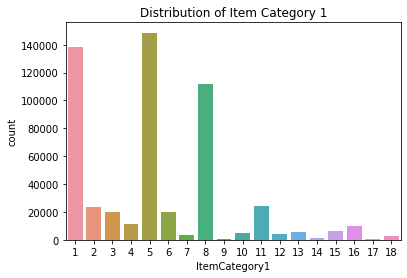

In [6]:
sns.countplot(x='ItemCategory1', data=df);
plt.title('Distribution of Item Category 1');

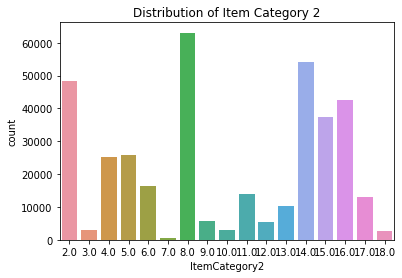

In [7]:
sns.countplot(x='ItemCategory2', data=df);
plt.title('Distribution of Item Category 2');

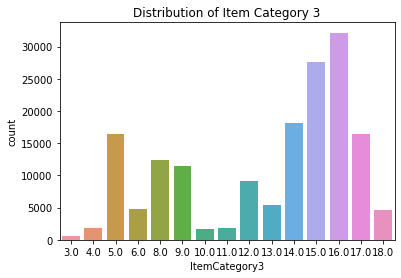

In [8]:
sns.countplot(x='ItemCategory3', data=df);
plt.title('Distribution of Item Category 3');

## City Type

In [9]:
df['CityType'].value_counts()

B    226493
C    166446
A    144638
Name: CityType, dtype: int64

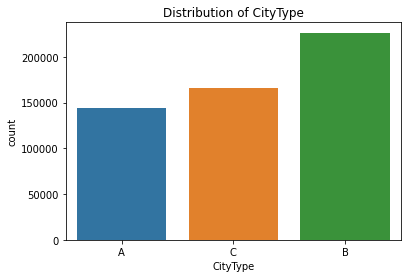

In [10]:
sns.countplot(x='CityType', data=df);
plt.title('Distribution of CityType');

# Sex

In [11]:
df['Sex'].value_counts()

M    405380
F    132197
Name: Sex, dtype: int64

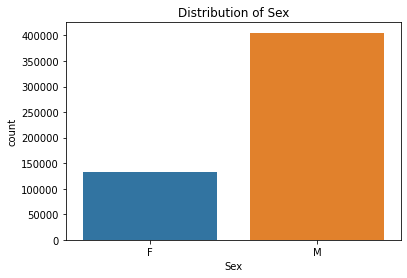

In [12]:
sns.countplot(x='Sex', data=df);
plt.title('Distribution of Sex');

# Age

In [13]:
df['Age'].describe()

count     537577
unique         7
top        26-35
freq      214690
Name: Age, dtype: object

In [14]:
df['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

# Profession

In [15]:
df['Profession'].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Profession, dtype: int64

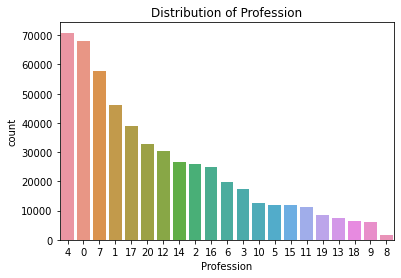

In [16]:
sns.countplot(x='Profession', data=df,order = df['Profession'].value_counts().index );
plt.title('Distribution of Profession');

## YearsInCity

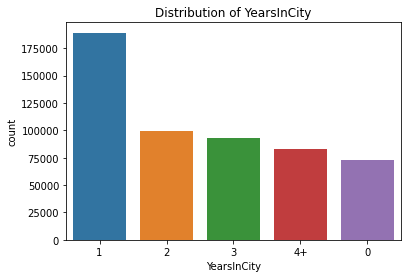

In [17]:
sns.countplot(x='YearsInCity', data=df, order = df['YearsInCity'].value_counts().index);
plt.title('Distribution of YearsInCity');

### HaveChildren

In [18]:
# For the segmentation analysis we will fill in the null values for the HaveChildren column with -1 to be able to identify them
df['HaveChildren'].fillna(-1, inplace=True)

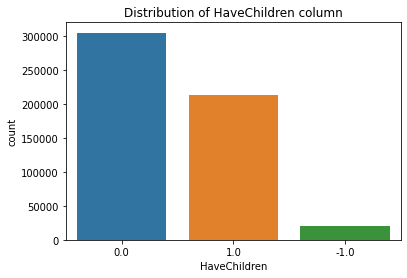

In [19]:
sns.countplot(x='HaveChildren', data=df, order = df['HaveChildren'].value_counts().index);
plt.title('Distribution of HaveChildren column');

# Question 1

As we want to do a segment analysis, we are going to focus in understand what kind of people buys the most popular item categories.

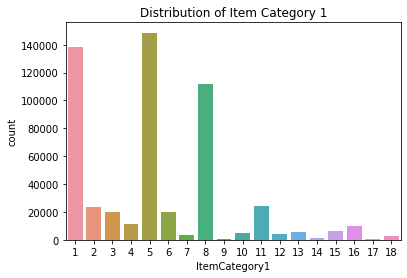

In [20]:
sns.countplot(x='ItemCategory1', data=df);
plt.title('Distribution of Item Category 1');

As we can see, there are 2 main categories that stands up above the rest. The Categories 1, 5 and 8. So, to keep the analysis readable, we will focus on understanding what types of people are the main buyers of these 3 categories.

In [21]:
#Create a dataframe per each of the categories to analyze
df_item_cat1 = df[df['ItemCategory1'] == 1]
df_item_cat5 = df[df['ItemCategory1'] == 5]
df_item_cat8 = df[df['ItemCategory1'] == 8]

### Compare by Sex

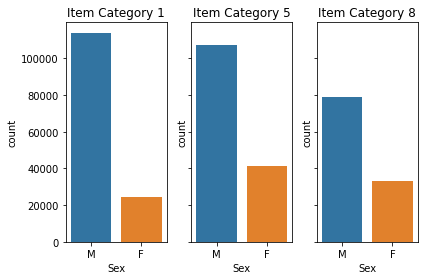

In [22]:
fig, ax = plt.subplots(1, 3, sharey = True)
ax1 = sns.countplot(x='Sex', data=df_item_cat1, ax=ax[0],order = df_item_cat1['Sex'].value_counts().index);
ax[0].set_title("Item Category 1")
ax2 = sns.countplot(x='Sex', data=df_item_cat5,ax=ax[1]);
ax[1].set_title("Item Category 5")
ax3 = sns.countplot(x='Sex', data=df_item_cat8, ax=ax[2]);
ax[2].set_title("Item Category 8")
plt.tight_layout()


We can see that the main buyers are always Male (because we have more data from men than from female), and we cannot see any specific product that is focused on females.

### Compare by Age

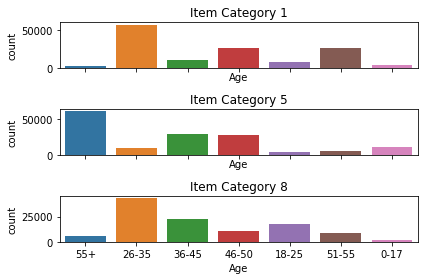

In [23]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax1 = sns.countplot(x='Age', data=df_item_cat1, ax=ax[0]);
ax[0].set_title("Item Category 1")
ax2 = sns.countplot(x='Age', data=df_item_cat5,ax=ax[1]);
ax[1].set_title("Item Category 5")
ax3 = sns.countplot(x='Age', data=df_item_cat8, ax=ax[2]);
ax[2].set_title("Item Category 8")
plt.tight_layout()

Here we can grab some interesting insights. For the Categoris 1 and 8, the main age range is 26-35, while the Category 5 is more likley to be bought by 55+ people.

### Compare by Profession

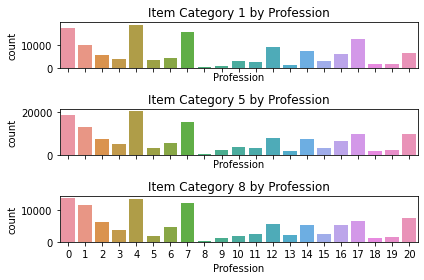

In [24]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax1 = sns.countplot(x='Profession', data=df_item_cat1, ax=ax[0]);
ax[0].set_title("Item Category 1 by Profession")
ax2 = sns.countplot(x='Profession', data=df_item_cat5,ax=ax[1]);
ax[1].set_title("Item Category 5 by Profession")
ax3 = sns.countplot(x='Profession', data=df_item_cat8, ax=ax[2]);
ax[2].set_title("Item Category 8 by Profession")
plt.tight_layout()

### Compare by Years in City

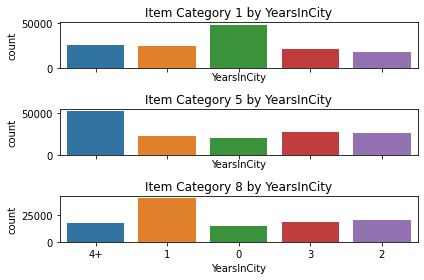

In [25]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax1 = sns.countplot(x='YearsInCity', data=df_item_cat1, ax=ax[0]);
ax[0].set_title("Item Category 1 by YearsInCity")
ax2 = sns.countplot(x='YearsInCity', data=df_item_cat5,ax=ax[1]);
ax[1].set_title("Item Category 5 by YearsInCity")
ax3 = sns.countplot(x='YearsInCity', data=df_item_cat8, ax=ax[2]);
ax[2].set_title("Item Category 8 by YearsInCity")
plt.tight_layout()

We can see that depending the category, there is signigicant changes in the years in the city variable, so this will allows us to make better distinction in our segements.

### Compare by CityType

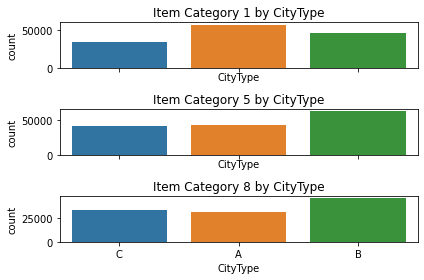

In [26]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax1 = sns.countplot(x='CityType', data=df_item_cat1, ax=ax[0]);
ax[0].set_title("Item Category 1 by CityType")
ax2 = sns.countplot(x='CityType', data=df_item_cat5,ax=ax[1]);
ax[1].set_title("Item Category 5 by CityType")
ax3 = sns.countplot(x='CityType', data=df_item_cat8, ax=ax[2]);
ax[2].set_title("Item Category 8 by CityType")
plt.tight_layout()

Again, we can see that depending the category, there is signigicant changes in the city type variable too, so this will allows us to make better distinction in our segements.

### Compare by HaveChildren Column

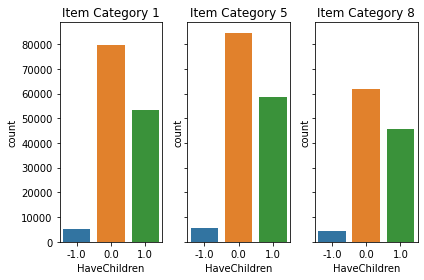

In [27]:
fig, ax = plt.subplots(1, 3, sharey = True)
ax1 = sns.countplot(x='HaveChildren', data=df_item_cat1, ax=ax[0]);
ax[0].set_title("Item Category 1")
ax2 = sns.countplot(x='HaveChildren', data=df_item_cat5,ax=ax[1]);
ax[1].set_title("Item Category 5")
ax3 = sns.countplot(x='HaveChildren', data=df_item_cat8, ax=ax[2]);
ax[2].set_title("Item Category 8")
plt.tight_layout()

We can see that the there maybe the only one category (the 8) is the one that having children cound have an impact on.

### Segmentation proposed and insights

We identify the user personas depending on the item category that we want to focus, so for the 3 main categories analyzed, we can segment the users like this:

**For item category 1:**
- Users that live in a City type A and just arrive to the city (YearsInCity = 0)
- Working in Profession 4, 0 or 7
- With age between 26-35

**For item category 5:**
- Users that live in a City type B and been living there for 4+ years
- Working in Profession 4, 0 or 7
- With age > 55 years

**For item category 8:**
- Users that live in a City type B and been living there for 1 year
- Working in Profession 4, 0, 7 or 1
- With age between 26-35


We focused on these categories that are the biggest ones, so ithey will be more options to target the users and increase the sales of them. If we want to tackle a specific category we should do a segementation analysis following the same approach that we did here to understan what type of users we should focus on.

As we want to do a segmentation analysis at customer level, we need to transform our dataset from customer-article level to a customer level, so we do not have duplicate customers

# Question 2

To improve the segmentation analysis I would like to have the next data:
- **Price of the item:** Having the price of the item will help us to understand the revenue of an user and we could create segments according to the money they spend on IKEA. This way we could do specific actions for those who spend more money.
- **Number of products seen and not bought:** This will help us to check the conversion rate and see what articles works better than others.
- **Lifetime Value of the user:** This can help us identify the segments more valuable to us so we can decide what kind of actions we should do depending this variable.
- **Real name of the categories:** This could help us to dientify possible connection between the categories (For example, a person that just arrives to the city may need articles for the whole house, bedroom, kitchen... etc).

# Question 3

According to the segmentation proposed in question 1, we reccomend to focus on the item category 5, as it is the most popular. For that, the segment to focus on is:

- Users that live in a City type B and been living there for 4+ years
- Working in Profession 4, 0 or 7
- With age > 55 years

# Question 4

We want to visualize what fields are more likely to predict the “HaveChildren” column. For that we will train a Random Forest and use its feauture importance function to check the weight of the different variables

First, we prepare the dataframe with data to train the model, and also create a dataframe with the missing values to predict later.

In [28]:
# replace the categories of the Age column with numeric values so that we can use this in the model
df['Age'].replace({'0-17':0, '18-25':18, '26-35':26, '36-45':36, '46-50':46, '51-55':51, '55+':55}, inplace=True)
df['Age'].value_counts()

26    214690
36    107499
18     97634
46     44526
51     37618
55     20903
0      14707
Name: Age, dtype: int64

In [29]:
# replace the +4 in the YearsInCity to leave it as 4 only so that we can use this as the category for the model
df['YearsInCity'].replace('4+', 4, inplace=True)
df['YearsInCity'] = df['YearsInCity'].astype(int)

In [30]:
# remove the IDs as they are not really interesting for the clustering model to create the segmentation analysis
df.drop(['CustomerID', 'ItemID'], axis=1, inplace=True)

In [31]:
# Fill in blanks for the different item categories with zeros and make them int type
df['ItemCategory1'].fillna(0, inplace=True)
df['ItemCategory1'] = df['ItemCategory1'].astype(int)

df['ItemCategory2'].fillna(0, inplace=True)
df['ItemCategory2'] = df['ItemCategory2'].astype(int)

df['ItemCategory3'].fillna(0, inplace=True)
df['ItemCategory3'] = df['ItemCategory3'].astype(int)

In [32]:
#Prepare both dataframes
df_children = df[df['HaveChildren']!= -1]
df_test = df[df['HaveChildren'] == -1]

In [33]:
#We split into X (features to feed the model) and y (variable to predict)
X = df_children.loc[:,df_children.columns != 'HaveChildren']
y = df_children['HaveChildren']

We need to change categorical variables (CityType) into dummy/indicator variables. in order to be able to introduce it in the model. We also change Profession to one hot encoding to avoid create ficticious distance between professions  as the distance between all professions should be the same.

In [34]:
#Convert categorical variable into dummy/indicator variables.
X = pd.get_dummies(X,columns=['CityType','Profession','Sex'])
X

,Age,YearsInCity,ItemCategory1,ItemCategory2,ItemCategory3,Amount,CityType_A,CityType_B,CityType_C,Profession_0,...,Profession_13,Profession_14,Profession_15,Profession_16,Profession_17,Profession_18,Profession_19,Profession_20,Sex_F,Sex_M
0,0,2,3,0,0,8370,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,2,1,6,14,15200,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,12,0,0,1422,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,2,12,14,0,1057,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,55,4,8,0,0,7969,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,36,1,1,2,0,11664,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
537573,36,1,1,15,16,19196,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
537574,36,1,8,15,0,8043,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
537575,36,1,5,0,0,7172,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


Next step is splitting the dataframes into train and validation

In [35]:
X_train, X_validation, y_train, y_validation  = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
# In order to identify which of those the missing the information of the children, we use a classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_validation)

We check the Root Mean Square Error to see how good is our prediction

In [37]:
# Use scikit-learn to calculate the RMSE
rmse = mean_squared_error(y_validation, predictions_rf, squared=False)
print('The error is {}'.format(rmse))


The error is 0.4625796272686771


In a really general term, we consider that <0.5 is a valid error so we accept the results

Now we check the feature importance, and for easy comparision we paint the results in graph, ordered from the feature that has the biggest weight to the one that has the smallest.

Text(0.5, 0, 'Random Forest Feature Importance')

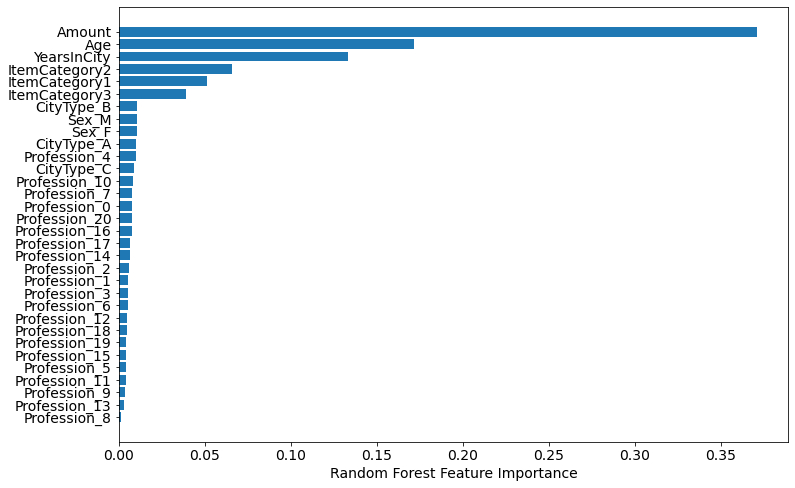

In [38]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

We can see that the variable with a biggest impact is the amount of time checking an article, followed by the age and the amount of years that they are in the city. It is also possible that the item category 2 contains child/family related products as is the item category with the most weight